# Benchmarking V7 reduced datset with AutoGluon
# Using presets

In [ ]:
!nvidia-smi

Sun Apr 16 22:32:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lsb_release -a

# Connecting to google drive and directing to folders with valtrain and test sets

In [3]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


# Iinstalling CUDA

In [4]:
!pip install --upgrade mxnet-cu112

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Approximately 3 minutes to install

In [5]:
!pip install autogluon==0.6.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Restart runtime after installing ipykernel (~13 seconds)

In [ ]:
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.1 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=5.5.6, but you have ipykernel 6.22.0 which is incompatible.


In [6]:
import autogluon as ag

In [7]:
from autogluon.vision import ObjectDetector

/usr/local/lib/python3.9/dist-packages/gluoncv/__init__.py:16: UserWarning: Both `mxnet==1.9.1` and `torch==1.12.1+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  _require_mxnet_version('1.4.0', '2.0.0')
2023-04-17 03:59:44.508472: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-17 03:59:44.568826: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 03:59:45.562842: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning

Changing into directory where datasets are stored

In [9]:
%cd /content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/V7_reduced

/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/V7_reduced


In [ ]:
!ls

V7_test  V7_train  V7_validation


In [ ]:
#!sudo apt install tree
#!tree -d

In [ ]:
import os

images_count = 0
annotation_count = 0

images_dir = os.getcwd()+"/V7_train/V7/JPEGImages/"
annotation_dir = os.getcwd()+"/V7_train/V7/Annotations/"

for path in os.listdir(images_dir):
  if os.path.isfile(os.path.join(images_dir,path)):
    images_count+=1

for path in os.listdir(annotation_dir):
  if os.path.isfile(os.path.join(annotation_dir,path)):
    annotation_count+=1

print("Images count:", images_count)
print("Annotation count:", annotation_count)

Images count: 5040
Annotation count: 5040


### Trying to check the "trainval.txt" file and see if it has corresponding annotations (.xml) and images (.jpg) for each line listed.

In [ ]:
def check_if_existsJPG(file_path, string):
    # check if the file exists in the given folder path
    return os.path.exists(os.path.join(file_path, string + ".jpg"))

def check_if_existsXML(file_path, string):
  return os.path.exists(os.path.join(file_path, string + ".xml"))

def read_strings_from_file(file_name):
    # read strings from a file, where each string is separated by a new line
    with open(file_name, "r") as file:
        strings = file.read().splitlines()
    return strings

def jpgCheck(strings_file, folder_path):
    # read strings from the given file
    strings = read_strings_from_file(strings_file)
    exists = 0
    nonexists = 0

    # check if the corresponding file with .jpg extension exists in the folder
    for string in strings:
        if check_if_existsJPG(folder_path, string):
            #print(f"{string}.jpg exists in {folder_path}")
            exists = exists + 1 
        else:
            #print(f"{string}.jpg does not exist in {folder_path}")
            nonexists = nonexists + 1

    return exists, nonexists

def xmlCheck(strings_file, folder_path):
    # read strings from the given file
    strings = read_strings_from_file(strings_file)
    exists = 0
    nonexists = 0

    # check if the corresponding file with .jpg extension exists in the folder
    for string in strings:
        if check_if_existsXML(folder_path, string):
            #print(f"{string}.jpg exists in {folder_path}")
            exists = exists + 1 
        else:
            #print(f"{string}.xml does not exist in {folder_path}")
            nonexists = nonexists + 1

    return exists, nonexists

In [ ]:
numExist = jpgCheck(os.getcwd()+'/V7_validation/V7/ImageSets/Main/validation.txt', os.getcwd()+'/V7_validation/V7/JPEGImages')
print(numExist)

(1080, 0)


In [ ]:
xmlExist = xmlCheck(os.getcwd()+'/V7_validation/V7/ImageSets/Main/validation.txt', os.getcwd()+'/V7_validation/V7/Annotations')
print(xmlExist)

(1080, 0)


### Main chunk of code for training. Below we are importing the dataset and running it. Will take some time.

In a future release ObjectDetector may be entirely reworked to use Torch as a backend.
This future change will likely be API breaking.Users should ensure they update their code that depends on ObjectDetector when upgrading to future AutoGluon releases.
For more information, refer to ObjectDetector refactor GitHub issue: https://github.com/autogluon/autogluon/issues/1559

Presets specified: ['good_quality_fast_inference']
Starting HPO experiments


  0%|          | 0/512 [00:00<?, ?it/s]

INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.valid.batch_size 16 != 8
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.train.epochs    20 != 50
INFO:SSDEstimator:root.train.seed      233 != 46
INFO:SSDEstimator:root.train.lr        0.001 != 0.0001
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.early_stop_patience -1 != 20
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.train.batch_size 16 != 8
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != (0,)
INFO:SSDEstimator:root.num_workers     4 != 12
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root.ssd.base_network vgg16_atrous != resnet50_v1
INFO:SSDEstimator:}
INFO:SSDEstimator:Saved config to /content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/V7_reduced/968b2c6a/.trial_0/config.yaml
[01:06:24] ../src


 97%|█████████▋| 175205/181188 [00:06<00:00, 29227.54KB/s]
181189KB [00:07, 25801.84KB/s]                            
INFO:SSDEstimator:Start training from [Epoch 0]
[01:06:54] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
INFO:SSDEstimator:[Epoch 0][Batch 99], Speed: 0.129780 samples/sec, CrossEntropy=1.917132, SmoothL1=0.492101
INFO:SSDEstimator:[Epoch 0][Batch 199], Speed: 0.146300 samples/sec, CrossEntropy=1.900106, SmoothL1=0.525190
INFO:SSDEstimator:[Epoch 0][Batch 299], Speed: 0.143877 samples/sec, CrossEntropy=1.916062, SmoothL1=0.521354
INFO:SSDEstimator:[Epoch 0][Batch 399], Speed: 0.137275 samples/sec, CrossEntropy=1.916942, SmoothL1=0.508321
INFO:SSDEstimator:[Epoch 0][Batch 499], Speed: 0.132204 samples/sec, CrossEntropy=1.921038, SmoothL1=0.519628
INFO:SSDEstimator:[Epoch 0][Batch 599], Speed: 0.1492


100%|██████████| 57421/57421 [00:02<00:00, 20125.33KB/s]
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.valid.batch_size 16 != 8
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.train.epochs    20 != 50
INFO:SSDEstimator:root.train.seed      233 != 46
INFO:SSDEstimator:root.train.lr        0.001 != 0.0015335192657991565
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.early_stop_patience -1 != 20
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.train.batch_size 16 != 8
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != (0,)
INFO:SSDEstimator:root.num_workers     4 != 12
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root.ssd.base_network vgg16_atrous != resnet50_v1
INFO:SSDEstimator:}
INFO:SSDEstimator:Saved config to /content/MyDrive/MyDrive/Colab Notebooks/ben


100%|██████████| 224190/224190 [00:08<00:00, 27539.04KB/s]
INFO:YOLOv3Estimator:Start training from [Epoch 0]
[03:36:21] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.valid.batch_size 16 != 64
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.train.epochs    20 != 50
INFO:SSDEstimator:root.train.seed      233 != 46
INFO:SSDEstimator:root.train.lr        0.001 != 0.0019578897201213
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.early_stop_patience -1 != 20
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.train.batch_size 16 != 64
INFO:SSDEstimator:root.gpus            (


 93%|█████████▎| 102048/110292 [00:04<00:00, 31561.23KB/s]
110293KB [00:04, 24488.89KB/s]                            
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.valid.batch_size 16 != 64
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.train.epochs    20 != 50
INFO:SSDEstimator:root.train.seed      233 != 46
INFO:SSDEstimator:root.train.lr        0.001 != 0.001142325415560837
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.early_stop_patience -1 != 20
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.train.batch_size 16 != 64
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != (0,)
INFO:SSDEstimator:root.num_workers     4 != 12
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root.ssd.base_network vgg16_atrous != resnet50_v1
INFO:SSDEstimator:}
INFO:SSDEstimato

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:YOLOv3Estimator:modified configs(<old> != <new>): {
INFO:YOLOv3Estimator:root.dataset         voc_tiny != auto
INFO:YOLOv3Estimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:YOLOv3Estimator:root.train.lr        0.001 != 0.007098936257405899
INFO:YOLOv3Estimator:root.train.early_stop_baseline 0.0 != -inf
INFO:YOLOv3Estimator:root.train.epochs    20 != 50
INFO:YOLOv3Estimator:root.train.seed      233 != 46
INFO:YOLOv3Estimator:root.train.early_stop_patience -1 != 20
INFO:YOLOv3Estimator:root.train.early_stop_max_value 1.0 != inf
INFO:YOLOv3Estimator:root.gpus            (0, 1, 2, 3) != (0,)
INFO:YOLOv3Estimator:root.num_workers     4 != 12
INFO:YOLOv3Estimator:}
INFO:YOLOv3Estimator:Saved config to /content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/V7_reduced/968b2c6a/.trial_7/config.yaml
INFO:YOLOv3Estimator:Using transfer learning from yolo3_darknet53_coco, the other network parameters are ignored.
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEs

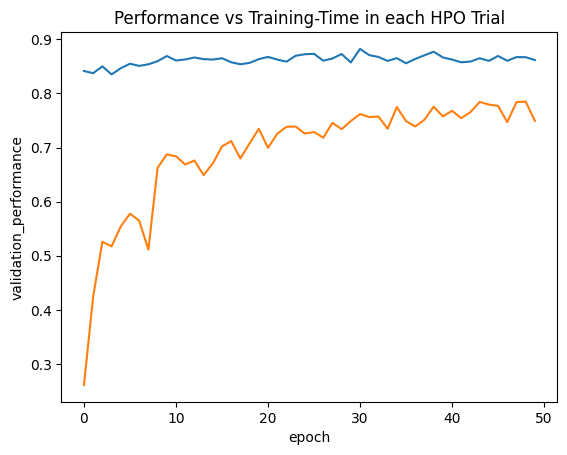

Finished, total runtime is 9027.27 s
{ 'best_config': { 'dataset': 'auto',
                   'dataset_root': 'auto',
                   'estimator': <class 'gluoncv.auto.estimators.ssd.ssd.SSDEstimator'>,
                   'gpus': [0],
                   'horovod': False,
                   'num_workers': 12,
                   'resume': '',
                   'save_interval': 1,
                   'ssd': { 'amp': False,
                            'base_network': 'resnet50_v1',
                            'data_shape': 512,
                            'filters': None,
                            'nms_thresh': 0.45,
                            'nms_topk': 400,
                            'ratios': ( [1, 2, 0.5],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0

In [15]:
dataset_train = ObjectDetector.Dataset.from_voc(root='V7_train/V7', splits='train')
dataset_val = ObjectDetector.Dataset.from_voc(root='V7_validation/V7', splits='validation')

detector = ObjectDetector()

import traceback
try:
    detector.fit(train_data=dataset_train, tuning_data=dataset_val, presets='good_quality_fast_inference', ngpus_per_trial=1)
except Exception as e:
    traceback.print_exc()

#Saving model
savefile = '/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/V7_reduced/V7_detector.ag'
detector.save(savefile)


In [16]:
ObjectDetector.fit_summary(detector)

{'train_map': 0.8600771109426166,
 'valid_map': 0.7849530363597901,
 'total_time': 9026.885636091232,
 'best_config': {'ssd': {'base_network': 'resnet50_v1',
   'data_shape': 512,
   'filters': None,
   'sizes': (30, 60, 111, 162, 213, 264, 315),
   'ratios': ([1, 2, 0.5],
    [1, 2, 0.5, 3, 0.3333333333333333],
    [1, 2, 0.5, 3, 0.3333333333333333],
    [1, 2, 0.5, 3, 0.3333333333333333],
    [1, 2, 0.5],
    [1, 2, 0.5]),
   'steps': (8, 16, 32, 64, 100, 300),
   'syncbn': False,
   'amp': False,
   'transfer': 'ssd_512_resnet50_v1_coco',
   'nms_thresh': 0.45,
   'nms_topk': 400},
  'train': {'batch_size': 8,
   'start_epoch': 0,
   'epochs': 50,
   'lr': 0.0001,
   'lr_decay': 0.1,
   'lr_decay_epoch': (160, 200),
   'momentum': 0.9,
   'wd': 0.0005,
   'log_interval': 100,
   'seed': 46,
   'dali': False,
   'early_stop_patience': 20,
   'early_stop_min_delta': 0.001,
   'early_stop_baseline': -inf,
   'early_stop_max_value': inf},
  'valid': {'batch_size': 8,
   'val_interval': 

# Below I'm loading the model and seeing the score against the test dataset

In [10]:
#detector.save(savefile1)
savefile = '/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/V7_reduced/V7_detector.ag'
new_detector = ObjectDetector.load(savefile)

dataset_test = ObjectDetector.Dataset.from_voc(root='V7_test/V7', splits='test')

test_map = new_detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][-1]))

/usr/local/lib/python3.9/dist-packages/mxnet/gluon/block.py:1784: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]
/usr/local/lib/python3.9/dist-packages/mxnet/gluon/block.py:1784: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]
[04:01:41] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)


mAP on test dataset: 0.17138873300988006


In [11]:
print("mAP on test dataset: {}".format(test_map[1][-1]))

mAP on test dataset: 0.17138873300988006


In [12]:
print(test_map)

(['person', 'bus', 'bird', 'horse', 'dog', 'airplane', 'train', 'cat', 'boat', 'mAP'], [0.5671161517994906, 0.9592339410567998, 0.006197864250825065, 0.002727272727272727, 0.0005347593582887701, 0.00040950040950040947, 0.00010023053021950487, 0.001100594320933304, 0.00507828263559025, 0.17138873300988006])


In [13]:
class_names = ['person', 'bus', 'bird', 'horse', 'dog', 'airplane', 'train', 'cat', 'boat', 'mAP']
aps = [0.5671161517994906, 0.9592339410567998, 0.006197864250825065, 0.002727272727272727, 0.0005347593582887701, 0.00040950040950040947, 0.00010023053021950487, 0.001100594320933304, 0.00507828263559025, 0.17138873300988006]

# Combine the class names and APs using the zip function
results = zip(class_names, aps)

# Format the output using f-strings
print("Class\t\tAP")
print("----\t\t--")
for class_name, ap in results:
    print(f"{class_name}\t\t{ap:.4f}")

Class		AP
----		--
person		0.5671
bus		0.9592
bird		0.0062
horse		0.0027
dog		0.0005
airplane		0.0004
train		0.0001
cat		0.0011
boat		0.0051
mAP		0.1714


In [ ]:
#image = '/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/COCO_reduced/COCO_test/VOC2012/JPEGImages/005791.jpg'

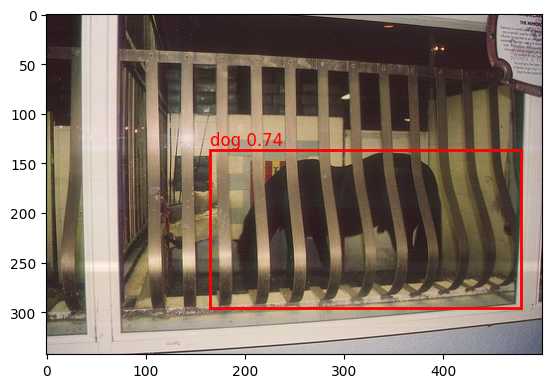

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = '/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced/VOC12_test/VOC2012/JPEGImages/002008.jpg'
image = np.array(Image.open(image_path))

# Load the prediction results
result = new_detector.predict(image)

# Create a figure and axes object
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Loop through the rows of the prediction results
for i, row in result[result['predict_score'] > 0.5].iterrows():
#for i, row in result.iterrows():
    # Get the class label, confidence score, and bounding box coordinates
    label = row['predict_class']
    score = row['predict_score']
    bbox = row['predict_rois']
    
    # Convert the normalized bounding box coordinates to pixel values
    x1 = int(bbox['xmin'] * image.shape[1])
    y1 = int(bbox['ymin'] * image.shape[0])
    x2 = int(bbox['xmax'] * image.shape[1])
    y2 = int(bbox['ymax'] * image.shape[0])
    
    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the axes object
    ax.add_patch(rect)
    
    # Add a label to the bounding box with the class label and confidence score
    ax.text(x1, y1-5, f"{label} {score:.2f}", fontsize=12, color='r')

# Show the plot
plt.show()


In [14]:
bulk_result = new_detector.predict(dataset_test)

[04:04:11] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[04:04:22] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[04:04:33] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[04:04:45] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[04:04:59] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running perf

In [15]:
bulk_result.to_csv('bulk_results.csv', index=False)

In [16]:
dataset_test.to_csv('dataset_test.csv', index=False)